Data Length >>  365 
Front 5 Data >> [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


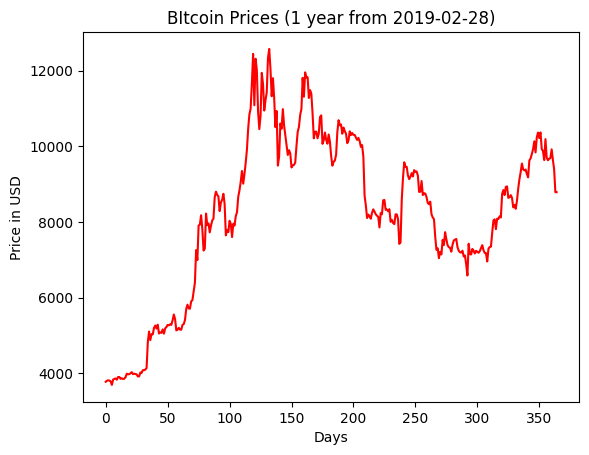

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = open('BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv', 'r')
coindesk_data = pd.read_csv(f, header=0)
seq = coindesk_data[['Closing Price (USD)']].to_numpy()
print('Data Length >> ', len(seq), '\nFront 5 Data >>', seq[:5])

plt.plot(seq, color='red')
plt.title('BItcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days'); plt.ylabel('Price in USD')
plt.show()

In [4]:
def seq2dataset(seq, window, horizon):
    X = []; Y = []
    for i in range(len(seq) - (window+horizon) + 1):
        x = seq[i:(i+window)]
        y = seq[i+window+horizon-1]
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w = 6; h = 1

X, Y = seq2dataset(seq, w, h)
print(X.shape, Y.shape)
print(X[0], Y[0]); print(X[-1], Y[-1])

(359, 6, 1) (359, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]] [3832.08088473]
[[9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [11]:
split = int(len(X)*.7)
x_train = X[:split]; y_train = Y[:split]
x_test = X[split:]; y_test = Y[split:]